In [1]:
# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
np.random.seed(42)

### Definição de funções.

In [3]:
def batchGradientDescent(X, y, alpha=0.4, n_iterations=1000, precision=0.0001):
    """Batch gradient descent solution."""
    
    N = len(y)
    
    # Random initialization of parameters.
    a = np.array([-10.0, -10.0]).reshape(2, 1)

    # Create vector for parameter history.
    a_hist = np.zeros((2, n_iterations+1))
    # Initialize history vector.
    a_hist[:, 0] = a.reshape(2,)

    # Create array for storing error values.
    Jgd = np.zeros(n_iterations+1)

    Jgd[0] = (1.0/N)*sum(np.power(y - X.dot(a), 2))

    # Batch gradient-descent loop.
    iteration = 0
    error = 1
    grad_hist = np.zeros((2, n_iterations))
    while iteration < n_iterations and error > precision:
        gradients = -(2.0/N)*X.T.dot(y - X.dot(a))
        a = a - alpha*gradients
        
        Jgd[iteration+1] = (1.0/N)*sum(np.power((y - X.dot(a)), 2))
        grad_hist[:, iteration] = gradients.reshape(2,)
        a_hist[:, iteration+1] = a.reshape(2,)
        
        error = np.abs(Jgd[iteration+1] - Jgd[iteration])
        iteration = iteration + 1
        
    return a, Jgd, a_hist, grad_hist, iteration

### Modelo não linear.

$$y = \frac{a_0 x_1}{a_1 + x_1}$$

In [4]:
# Define the number of samples.
N = 1000

# Weights.
a0 = 1.2
a1 = 2.66

# Return numbers spaced evenly on a log scale.
x1 = np.logspace(0,2,N).reshape(N,1)

# Non-linear model.
y = (a0*x1) / (a1 + x1)

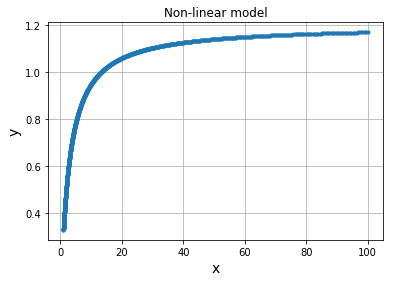

In [5]:
plt.plot(x1, y, '.')
plt.title('Non-linear model')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid()
# Save figure
#plt.savefig("non-linear-model.png", dpi=600)
plt.show()

### Linearização

Modelo linearizado:

$$y_{lin} = \frac{1}{y} = \frac{1}{a_0} + \frac{a_1}{a_0}\frac{1}{x_1} = a_0' + a_1' x_1'$$

In [6]:
# Linearized model.
# ylin = y_ = 1/y = (1/a0) + (a1/a0)(1/x1) = a0' + a1'x1'

y_ = 1/y
y_ = y_.reshape(N,1)

x1_ = 1/x1
x1_ = x1_.reshape(N,1)

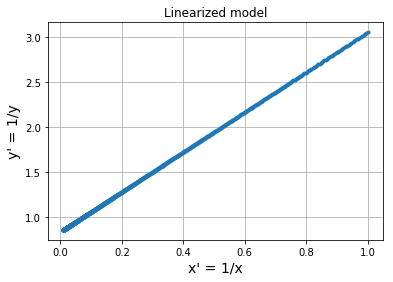

In [7]:
plt.plot(x1_, y_, '.')
plt.title('Linearized model')
plt.xlabel("x' = 1/x", fontsize=14)
plt.ylabel("y' = 1/y", fontsize=14)
plt.grid()
# Save figure
#plt.savefig("linearized-model.png", dpi=600)
plt.show()

**OBS**.: Depois do modelo ser linearizado, os pesos podem ser encontrados com a **equação normal** ou com o **gradiente descendente**.

In [8]:
# Generate values for parameters.
M = 200
a0_ = np.linspace(-12.0, 14.0, M)
a1_ = np.linspace(-12.0, 14.0, M)

A0, A1 = np.meshgrid(a0_, a1_)

# Generate points for plotting the cost-function surface.
J = np.zeros((M,M))
for iter1 in range(0, M):
    for iter2 in range(0, M):
        yhat = A0[iter1, iter2] + A1[iter1, iter2]*x1_
        J[iter1, iter2] = (1.0/N)*np.sum(np.square(y_ - yhat))

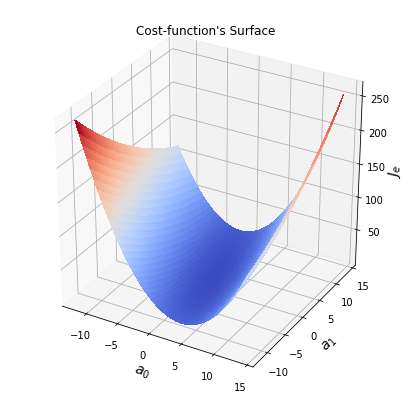

In [9]:
# Plot cost-function surface.
fig = plt.figure(figsize=(7,7))
plt.subplot(projection='3d')
ax = fig.gca()
surf = ax.plot_surface(A0, A1, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$a_0$', fontsize=14)
ax.set_ylabel('$a_1$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('Cost-function\'s Surface')
#plt.savefig("error_surface_linearization.png", dpi=600)
#Show the plot.
plt.show()

### Solução com a forma fechada.

In [10]:
# Concatenate both column vectors.
X = np.c_[np.ones((N,1)), x1_]

# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y_))

### Solução com gradiente descendente.

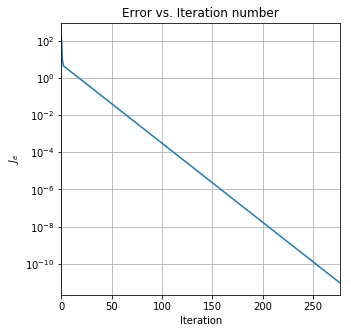

In [11]:
# learning rate.
alpha = 0.4

# Maximum number of iterations.
n_iterations = 10000

# Precision of the stop criteria.
precision = 1e-12

# Gradient descent.
a, Jgd, a_hist, grad_hist, iteration = batchGradientDescent(X, y_, alpha, n_iterations, precision)

fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.grid()
# Save figure
#plt.savefig("error-vs-iteration-number-linearization.png", dpi=600)
plt.show()

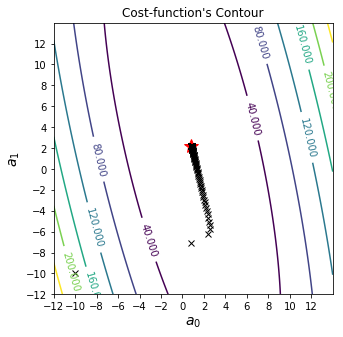

In [12]:
# Plot figure.        
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A0, A1, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_0$', fontsize=14)
plt.ylabel('$a_1$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=14)
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xticks(np.arange(-12, 14, step=2.0))
plt.yticks(np.arange(-12, 14, step=2.0))
#plt.savefig("error_contour_linearization.png", dpi=600)
plt.show()

### Valor dos pesos modificados.

In [17]:
print('Pesos originais')
print("a0' :", 1/a0)
print("a1':", a1/a0)

print('\nEquação normal')
print("a0'_opt:", a_opt[0,0])
print("a1'_opt:", a_opt[1,0])

print('\nGradiente descendente')
print("a0'_gd:", a[0,0])
print("a1'_gd:", a[1,0])

Pesos originais
a0' : 0.8333333333333334
a1': 2.216666666666667

Equação normal
a0'_opt: 0.8333333333333354
a1'_opt: 2.2166666666666615

Gradiente descendente
a0'_gd: 0.8333360954169736
a1'_gd: 2.2166546013380724
